# Library

In [1]:
import numpy as np
from scipy.io import wavfile

In [4]:
import numpy as np

npz_path = "../preprocess/emg_phase1_augment.npz"
data = np.load(npz_path, allow_pickle=True)

data = dict(data)

In [5]:
print(*data.keys(), sep="\n")
train = data['X_train']
train.shape


X_train
X_val_normal
X_val_abnormal
X_val_mixed
X_test_normal
X_test_abnormal
X_test_mixed
X_val_abn_plus_mixed
X_test_abn_plus_mixed
meta


(194944, 110, 1)

In [2]:
directory = "../Dataset/Spontanaktivität"
example_file = f"{directory}/BA0803901.wav"  # Beispiel-Datei anpassen

In [1]:
from plotter import plot_wav

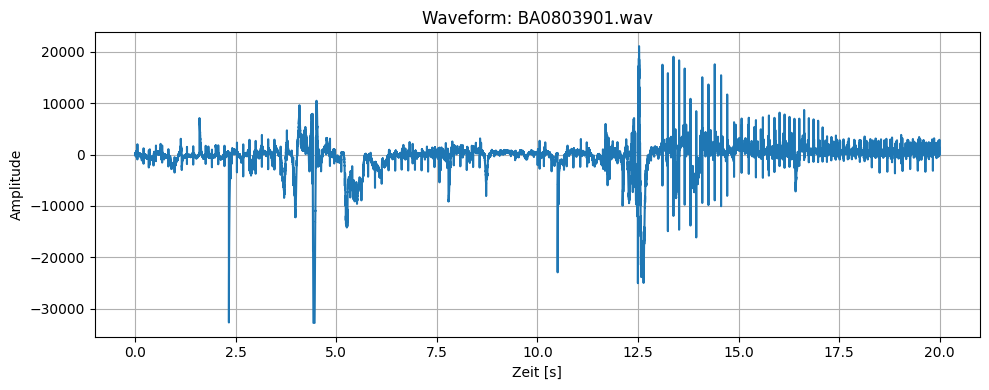

In [2]:
directory = "../Dataset/Spontanaktivität"
example_file = f"{directory}/BA0803901.wav"  # Beispiel-Datei anpassen
plot_wav(example_file)

In [4]:
from analysis import *

          Kategorie  Anzahl Dateien  Durchschnittsdauer (s)  Min Dauer (s)  \
0            Normal              53               13.113208            3.0   
1  Spontanaktivität              36               15.527778            5.0   

   Max Dauer (s)               Samplingrate  
0           20.0  ([11025, 44100], [52, 1])  
1           20.0            ([11025], [36])  


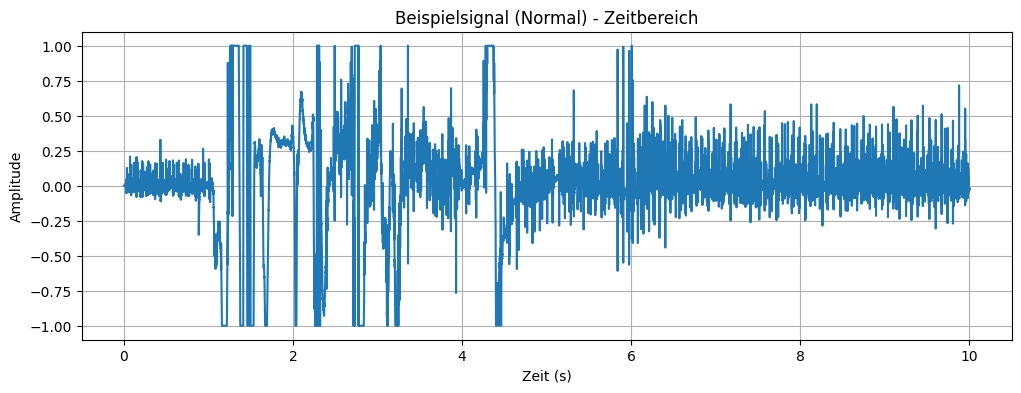

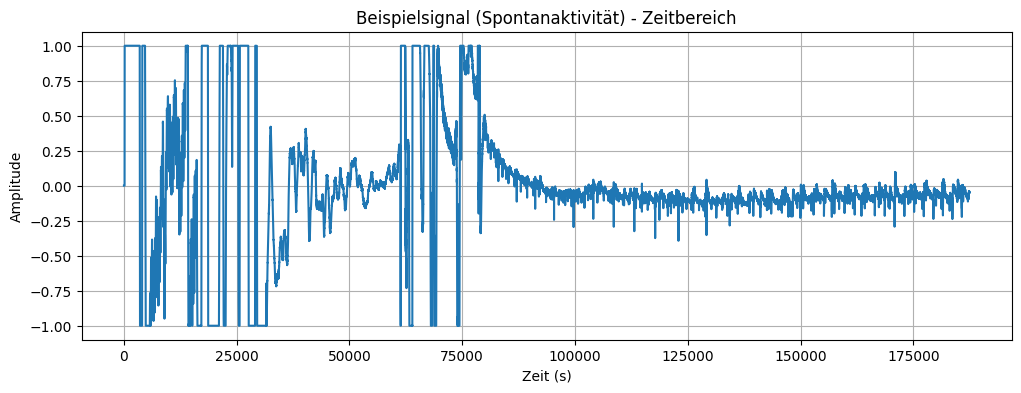

/home/kommegle/Masterarbeit/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8283: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


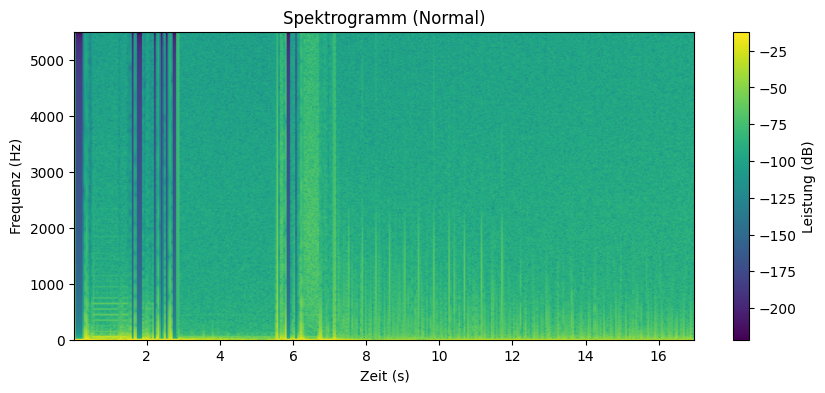

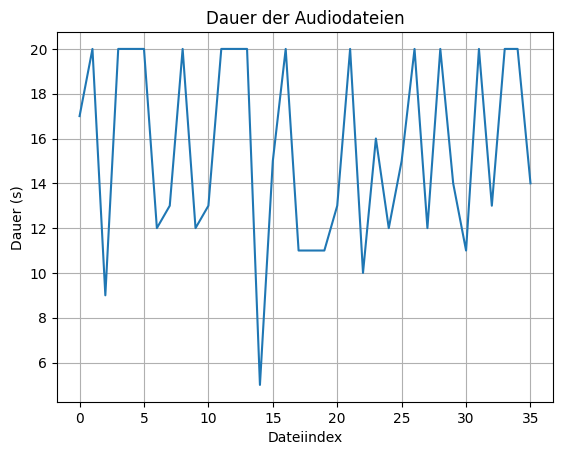

In [9]:
# Ziel der ersten Analyse
    #-Wie groß ist der Datensatz wirklich?
    #-Sind die Dateien konsistent (Samplingrate, Bitrate, Dauer)?
    #-Wie unterscheiden sich die Normal- und Spontanaktivitäts-Signale im Zeit- und Frequenzbereich?



import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Pfade
base_path = "../Dataset"
categories = ["Normal", "Spontanaktivität"]

# Ergebnisse speichern
summary = []

for category in categories:
    folder = os.path.join(base_path, category)
    files = [f for f in os.listdir(folder) if f.endswith(".wav")]

    durations = []
    sample_rates = []

    for f in files:
        file_path = os.path.join(folder, f)
        y, sr = librosa.load(file_path, sr=None)
        durations.append(len(y) / sr)
        sample_rates.append(sr)

    summary.append({
        "Kategorie": category,
        "Anzahl Dateien": len(files),
        "Durchschnittsdauer (s)": np.mean(durations),
        "Min Dauer (s)": np.min(durations),
        "Max Dauer (s)": np.max(durations),
        "Samplingrate": np.unique(sample_rates, return_counts=True)
    })

# Ergebnisse als DataFrame anzeigen
df_summary = pd.DataFrame(summary)
print(df_summary)

# Beispielsignal visualisieren (Zeit & Frequenz)
example_path = os.path.join(base_path, "Normal", os.listdir(os.path.join(base_path, "Normal"))[0])
# example_path = os.path.join(base_path, "Spontanaktivität", os.listdir(os.path.join(base_path, "Spontanaktivität"))[0])
# example_path = "Dataset/Spontanaktivität/BA0803901.wav"
y, sr = librosa.load(example_path, sr=None)

plt.figure(figsize=(12,4))
plt.title("Beispielsignal (Normal) - Zeitbereich")

plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
example_path = os.path.join(base_path, "Spontanaktivität", os.listdir(os.path.join(base_path, "Spontanaktivität"))[0])
y, sr = librosa.load(example_path, sr=None)
# plt.plot(np.linspace(0, len(y)/sr, len(y)), y)
plt.plot(y)
plt.title("Beispielsignal (Spontanaktivität) - Zeitbereich")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



# Frequenzanalyse
plt.figure(figsize=(10,4))
plt.specgram(y, Fs=sr, NFFT=1024, noverlap=512, cmap='viridis')
plt.title("Spektrogramm (Normal)")
plt.xlabel("Zeit (s)")
plt.ylabel("Frequenz (Hz)")
plt.colorbar(label="Leistung (dB)")
plt.show()

plt.plot(durations)
plt.title("Dauer der Audiodateien")
plt.xlabel("Dateiindex")
plt.ylabel("Dauer (s)")
plt.grid(True)
plt.show()


In [8]:
df_summary

,Kategorie,Anzahl Dateien,Durchschnittsdauer (s),Min Dauer (s),Max Dauer (s),Samplingrate
0,Normal,53,13.113208,3.0,20.0,"([11025, 44100], [52, 1])"
1,Spontanaktivität,36,15.527778,5.0,20.0,"([11025], [36])"


number of channels = 2
length = 0.01s


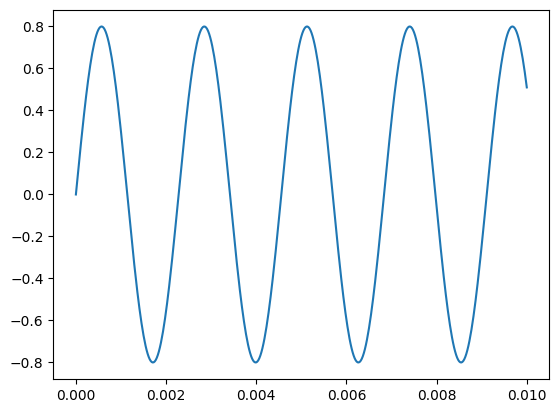

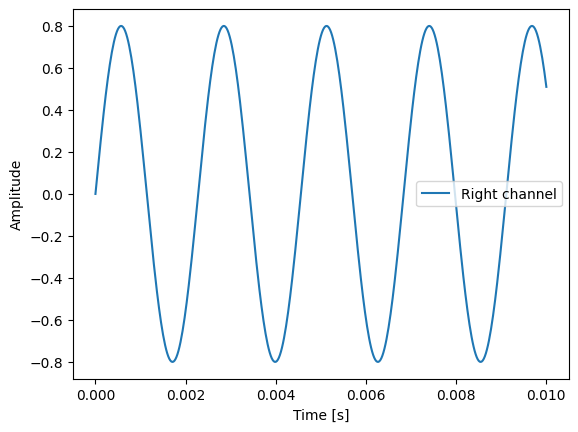

In [ ]:
import scipy.io
from icecream import ic
from scipy.io import wavfile
from os.path import dirname, join as pjoin

# Get the filename for an example .wav file from the tests/data directory.

data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname = pjoin(data_dir, 'test-44100Hz-2ch-32bit-float-be.wav')

# Load the .wav file contents.

samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")
# number of channels = 2
length = data.shape[0] / samplerate
print(f"length = {length}s")
ic(data.shape)

# length = 0.01s

# Plot the waveform.

import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.show()
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()